# MARS3888 - Finding and Using Online Datasets 

## Notebook 4 - Example Datasets


+ Use this notebook and Notebooks 1 to 3 as a guide to access these example datasets

#### Libraries

First of all, load the necessary libraries:

+ xarray

If you wish plot or analysis the datasets listed in this notebook you will need to add these libraries to your first section of code:

+ numpy
+ matplotlib
+ xarray
+ NetCFD4
+ datetime
+ cartopy
+ cmocean
+ seaborn
+ scipy
+ pymannkendall

In [10]:
import os
import xarray as xr

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Dataset: NOAA Coral Reef Watch via OPeNDAP (Thredds) server

## 1985 - 2021

Info: https://coralreefwatch.noaa.gov/

NOAA OPeNDAP [NOAA Coral Reef Watch](https://www.ncei.noaa.gov/thredds-ocean/catalog/crw/5km/catalog.html) 

Example data:

+ Monthly max DHW data: [ct5km_dhw-max_v3.1_201701.nc](https://www.ncei.noaa.gov/thredds-ocean/dodsC/crw/5km/v3.1/nc/v1.0/monthly/2017/ct5km_dhw-max_v3.1_201701.nc.html)

Variables of interest:

+ DHW - Degree heating weeks
+ SST - Sea surface temperature

NB: this server for this dataset is separated by years 

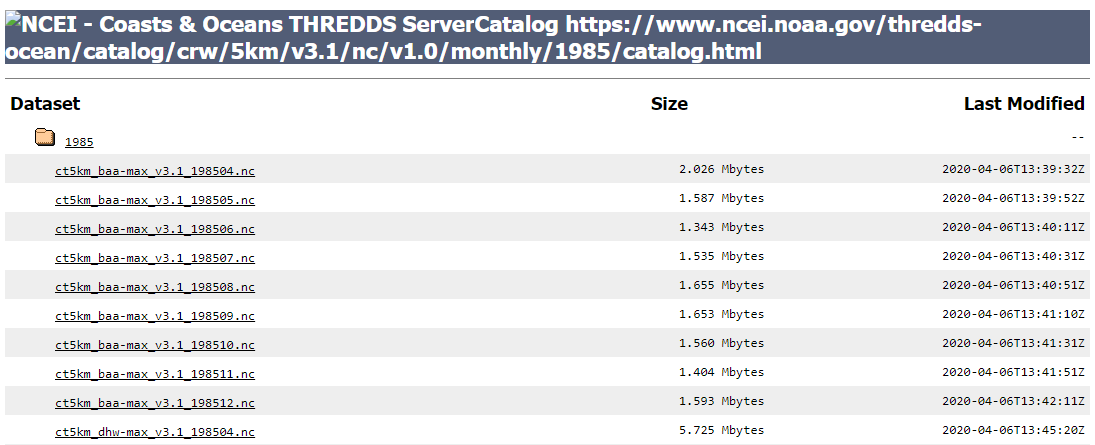

Load sinlge netCDF file to understand the structure

In [11]:
url="https://www.ncei.noaa.gov/thredds-ocean/dodsC/crw/5km/v3.1/nc/v1.0/monthly/2017/ct5km_dhw-max_v3.1_201703.nc"
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:              (time: 1, lat: 3600, lon: 7200)
Coordinates:
  * time                 (time) datetime64[ns] 2017-03-31T12:00:00
  * lat                  (lat) float32 89.97 89.93 89.88 ... -89.92 -89.97
  * lon                  (lon) float32 -180.0 -179.9 -179.9 ... 179.9 180.0
Data variables:
    crs                  int16 ...
    mask                 (lat, lon) int8 ...
    degree_heating_week  (time, lat, lon) float32 ...
    date                 (time, lat, lon) float32 ...
Attributes: (12/59)
    Conventions:                     CF-1.6, ACDD-1.3
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v2.0
    title:                           NOAA Coral Reef Watch Global 5km Satelli...
    summary:                         This is a product of NOAA Coral Reef Wat...
    references:                      https://coralreefwatch.noaa.gov/satellit...
    institution:                     NOAA/NESDIS/STAR Coral Reef Watch program
    ...                              ...
    publisher_email:                 coralreefwatch@noaa.gov
    contributor_name:                NOAA Coral Reef Watch program
    contributor_role:                Collecting source data and deriving prod...
    processing_level:                Derived from L4 satellite sea surface te...
    cdm_data_type:                   Grid
    DODS_EXTRA.Unlimited_Dimension:  time

The data is stored on the server in year folders. The following code makes a list of data URLs with the subfolder structure. Edit the start and end dates in the below code to change the datarange.

In [12]:
base_url = "https://www.ncei.noaa.gov/thredds-ocean/dodsC/crw/5km/v3.1/nc/v1.0/monthly/"

start_date = "2017-01"  # Start date in yyyy-mm format (first file = "1985-04")
stop_date = "2017-01"   # Stop date in yyyy-mm format (last file = "2021-11")

start_year, start_month = start_date.split("-")
stop_year, stop_month = stop_date.split("-")

start_year = int(start_year)
start_month = int(start_month)
stop_year = int(stop_year)
stop_month = int(stop_month)

noaafiles = []

# Based on the server the file naming convention 
for year in range(start_year, stop_year+1):
    if year == start_year:
        year_month_st = start_month
    else:
        year_month_st = 1
    if year == stop_year:
        year_month_ed = stop_month
    else:
        year_month_ed = 12
    yearfiles = [f"{base_url}{year}/ct5km_dhw-max_v3.1_{year}{month:02}.nc" for month in range(year_month_st, year_month_ed+1)]
    noaafiles.extend(yearfiles)

noaafiles

['https://www.ncei.noaa.gov/thredds-ocean/dodsC/crw/5km/v3.1/nc/v1.0/monthly/2017/ct5km_dhw-max_v3.1_201701.nc']

In [13]:
ds_dhw = xr.open_mfdataset(noaafiles)
ds_dhw

<xarray.Dataset>
Dimensions:              (time: 1, lat: 3600, lon: 7200)
Coordinates:
  * time                 (time) datetime64[ns] 2017-01-31T12:00:00
  * lat                  (lat) float32 89.97 89.93 89.88 ... -89.92 -89.97
  * lon                  (lon) float32 -180.0 -179.9 -179.9 ... 179.9 180.0
Data variables:
    crs                  int16 ...
    mask                 (lat, lon) int8 dask.array<chunksize=(3600, 7200), meta=np.ndarray>
    degree_heating_week  (time, lat, lon) float32 dask.array<chunksize=(1, 3600, 7200), meta=np.ndarray>
    date                 (time, lat, lon) float32 dask.array<chunksize=(1, 3600, 7200), meta=np.ndarray>
Attributes: (12/59)
    Conventions:                     CF-1.6, ACDD-1.3
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v2.0
    title:                           NOAA Coral Reef Watch Global 5km Satelli...
    summary:                         This is a product of NOAA Coral Reef Wat...
    references:                      https://coralreefwatch.noaa.gov/satellit...
    institution:                     NOAA/NESDIS/STAR Coral Reef Watch program
    ...                              ...
    publisher_email:                 coralreefwatch@noaa.gov
    contributor_name:                NOAA Coral Reef Watch program
    contributor_role:                Collecting source data and deriving prod...
    processing_level:                Derived from L4 satellite sea surface te...
    cdm_data_type:                   Grid
    DODS_EXTRA.Unlimited_Dimension:  time

# Dataset: eReefs via NCI (Thredds) server

## 2010 - Now

Info: https://ereefs.org.au/ereefs

NCI [AIMS server](http://thredds.ereefs.aims.gov.au/thredds/catalog.html)

Example data: 

+ Monthly data: https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/monthly-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_monthly-monthly-2010-09.nc

Variables of interest:

+ ETA = Sea surface elevation
+ u - eastward current
+ v northward cureent
+ salt - salinity
+ temp - temperature
+ wspeed_u - eastward wind
+ wspeed_v - northward wind
+ temp_expose - DHW temp exposure

## See Notebook 1 for more...

In [14]:
url="https://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/monthly-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_monthly-monthly-2010-09.nc"
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:      (time: 1, k: 17, latitude: 723, longitude: 491)
Coordinates:
    zc           (k) float64 ...
  * time         (time) datetime64[ns] 2010-08-31T14:00:00
  * latitude     (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude    (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
Dimensions without coordinates: k
Data variables:
    salt         (time, k, latitude, longitude) float32 ...
    temp         (time, k, latitude, longitude) float32 ...
    u            (time, k, latitude, longitude) float32 ...
    v            (time, k, latitude, longitude) float32 ...
    mean_cur     (time, k, latitude, longitude) float32 ...
    eta          (time, latitude, longitude) float32 ...
    wspeed_u     (time, latitude, longitude) float32 ...
    wspeed_v     (time, latitude, longitude) float32 ...
    mean_wspeed  (time, latitude, longitude) float32 ...
Attributes: (12/22)
    Conventions:                     CF-1.0
    Run_ID:                          2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2023-01-25T15:16:32+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__gbr4_v2__...
    aims_ncaggregate_firstDate:      2010-09-01T00:00:00+10:00
    ...                              ...
    prefix_list_qudt__:              http://qudt.org/vocab/unit/
    shoc_version:                    v1.1 rev(5320M)
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 Hydrodynamic v2 m...
    DODS_EXTRA.Unlimited_Dimension:  time

# Dataset: Waves (WWIII / CMAR_CAWCR) via CSIRO (Thredds) server 

## 1979 - 2023

Info: https://data.csiro.au/collection/csiro:39819

NCI [Thredds Server](https://data-cbr.csiro.au/thredds/catalog/catch_all/CMAR_CAWCR-Wave_archive/CAWCR_Wave_Hindcast_aggregate/gridded/catalog.html)

Example data: 

+ Daily data: https://data-cbr.csiro.au/thredds/dodsC/catch_all/CMAR_CAWCR-Wave_archive/CAWCR_Wave_Hindcast_aggregate/gridded/ww3.pac_4m.202301.nc.html

Variables of interest:

+ uwnd - eastward current
+ vwnd - northward cureent
+ hs - significant wave height
+ t01m - sea surface wind wave mean period
+ dir - wave direction
+ fp - sea_surface_wave_peak_frequency
+ ...


In [15]:
url="https://data-cbr.csiro.au/thredds/dodsC/catch_all/CMAR_CAWCR-Wave_archive/CAWCR_Wave_Hindcast_aggregate/gridded/ww3.pac_4m.202301.nc"
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:    (longitude: 1276, latitude: 751, time: 744)
Coordinates:
  * longitude  (longitude) float32 125.0 125.1 125.1 125.2 ... 209.9 209.9 210.0
  * latitude   (latitude) float32 -30.0 -29.93 -29.87 -29.8 ... 19.87 19.93 20.0
  * time       (time) datetime64[ns] 2023-01-01 ... 2023-01-31T23:00:00.00001...
Data variables: (12/61)
    MAPSTA     (latitude, longitude) int16 ...
    dpt        (time, latitude, longitude) float32 ...
    uwnd       (time, latitude, longitude) float32 ...
    vwnd       (time, latitude, longitude) float32 ...
    ice        (time, latitude, longitude) float32 ...
    hs         (time, latitude, longitude) float32 ...
    ...         ...
    vtus       (time, latitude, longitude) float32 ...
    uuss       (time, latitude, longitude) float32 ...
    vuss       (time, latitude, longitude) float32 ...
    mssx       (time, latitude, longitude) float32 ...
    mssy       (time, latitude, longitude) float32 ...
    dtd        (time, latitude, longitude) float32 ...
Attributes: (12/19)
    WAVEWATCH_III_version_number:           4.18b
    WAVEWATCH_III_switches:                 F90 NOGRB LRB4 DIST MPI NOPA UQ P...
    SIN4_namelist_parameter_BETAMAX:        1.33
    SDS4_namelist_parameter_WHITECAPWIDTH:  0.3
    product_name:                           ww3.pac_4m.202301.nc
    area:                                   Pacific 4 min wave grid
    ...                                     ...
    maximum_altitude:                       9000 m
    altitude_resolution:                    n/a
    start_date:                             2023-01-01T00:00:00Z
    stop_date:                              2023-01-31T23:00:00Z
    DODS_EXTRA.Unlimited_Dimension:         time
    EXTRA_DIMENSION.level:                  1

# Dataset: BRAN2020 Ocean Currents via NCI/CSIRO (Thredds) server

## 1993 - 2022

Info: https://research.csiro.au/bluelink/bran2020-data-released/

NCI [Thredds Server](https://dapds00.nci.org.au/thredds/catalog/gb6/BRAN/BRAN2020/catalog.html)

Example data: 

+ Monthly data: https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/month/ocean_force_mth_2004_04.nc.html

Variables of interest:

+ atm_flux - total alkalinity
+ bmf_u - Bottom u-stress via bottom drag
+ bmf_v - Bottom v-stress via bottom drag
+ ...

In [16]:
url="https://dapds00.nci.org.au/thredds/dodsC/gb6/BRAN/BRAN2020/month/ocean_force_mth_2004_04.nc"
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:                (Time: 1, xt_ocean: 3600, yt_ocean: 1500, nv: 2,
                            xu_ocean: 3600, yu_ocean: 1500)
Coordinates:
  * xt_ocean               (xt_ocean) float64 0.05 0.15 0.25 ... 359.9 360.0
  * yt_ocean               (yt_ocean) float64 -74.95 -74.85 ... 74.85 74.95
  * Time                   (Time) datetime64[ns] 2004-04-16
  * nv                     (nv) float64 1.0 2.0
  * xu_ocean               (xu_ocean) float64 0.1 0.2 0.3 ... 359.8 359.9 360.0
  * yu_ocean               (yu_ocean) float64 -74.9 -74.8 -74.7 ... 74.9 75.0
Data variables: (12/18)
    average_DT             (Time) timedelta64[ns] ...
    average_T1             (Time) datetime64[ns] ...
    average_T2             (Time) datetime64[ns] ...
    Time_bounds            (Time, nv) timedelta64[ns] ...
    sfc_hflux              (Time, yt_ocean, xt_ocean) float32 ...
    sfc_salt_flux_restore  (Time, yt_ocean, xt_ocean) float32 ...
    ...                     ...
    swflx                  (Time, yt_ocean, xt_ocean) float32 ...
    evap_heat              (Time, yt_ocean, xt_ocean) float32 ...
    sens_heat              (Time, yt_ocean, xt_ocean) float32 ...
    lw_heat                (Time, yt_ocean, xt_ocean) float32 ...
    bmf_u                  (Time, yu_ocean, xu_ocean) float32 ...
    bmf_v                  (Time, yu_ocean, xu_ocean) float32 ...
Attributes:
    filename:                        ocean_force_2004_04_01.nc
    grid_type:                       regular
    grid_tile:                       N/A
    history:                         Tue Mar 30 16:48:35 2021: ncap2 -O -s av...
    NCO:                             netCDF Operators version 4.9.2 (Homepage...
    title:                           BRAN2020
    catalogue_doi_url:               http://dx.doi.org/10.25914/6009627c7af03
    acknowledgement:                 BRAN is made freely available by CSIRO B...
    DODS_EXTRA.Unlimited_Dimension:  Time

# Now search for datasets that you think might be useful for your projects